In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\users\PC Gaming\desktop\seeds.dataset.csv')

In [3]:
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
print(df.shape)

(210, 8)


In [5]:
df.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
 df.isnull().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

In [7]:
x = df[['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient',
        'lengthOfKernelGroove']].values
x[0:5]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]])

In [8]:
y = df["seedType"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: seedType, dtype: int64

In [9]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05,
         3.04218199e-01,  1.41701823e-01, -9.86151745e-01,
        -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01,
        -1.68624664e-01,  1.97432229e-01, -1.78816620e+00,
        -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00,
        -7.63637453e-01,  2.08047544e-01, -6.67479334e-01,
        -1.18919199e+00],
       [-3.47091272e-01, -4.75333162e-01,  1.03938133e+00,
        -6.88978054e-01,  3.19508356e-01, -9.60817955e-01,
        -1.22998260e+00],
       [ 4.45257175e-01,  3.30595037e-01,  1.37450924e+00,
         6.66655647e-02,  8.05159035e-01, -1.56349549e+00,
        -4.75356297e-01]])

In [10]:
y = df["seedType"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: seedType, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (168, 7) (168,)
Test set: (42, 7) (42,)


In [12]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [15]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 3, 2, 1, 2], dtype=int64)

In [16]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9642857142857143
Test set Accuracy:  0.9523809523809523


In [17]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=2)

In [18]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 3, 2, 1, 2], dtype=int64)

In [19]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9583333333333334
Test set Accuracy:  0.9523809523809523


In [20]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

In [21]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 3, 2, 1, 2], dtype=int64)

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9761904761904762


In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [31]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.98, 0.95, 0.95, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98])

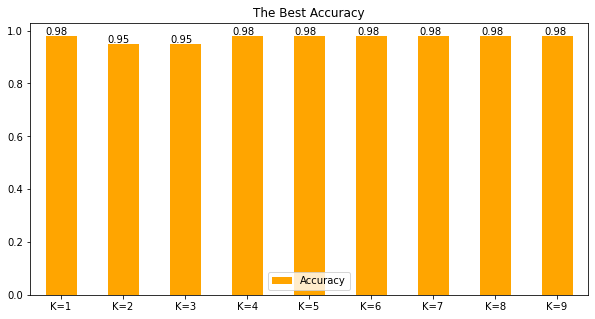

In [32]:
# Bar Accuracy 

accuracy = [0.98, 0.95, 0.95, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]
index = ['K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6', 'K=7', 'K=8', 'K=9']
accurat= pd.DataFrame({'Accuracy': accuracy}, index=index)
ax = accurat.plot.bar(rot=0, color='orange', figsize=(10,5), title='The Best Accuracy', legend=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9761904761904762 with k= 1


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        15
           3       1.00      0.93      0.97        15

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

Confusion matrix, without normalization
[[12  0  0]
 [ 0 15  0]
 [ 1  0 14]]


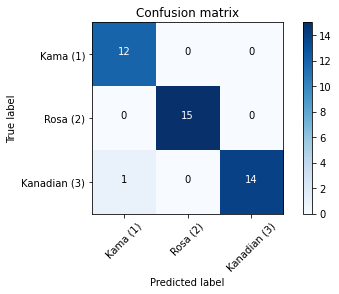

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Kama (1)','Rosa (2)', 'Kanadian (3)'],normalize= False,  title='Confusion matrix')

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9762561576354681